Created by Chaeyeon Han   
2021-05-14

<h3>Import Libraries and Datasets</h3>

In [1]:
%matplotlib inline
import os
from matplotlib import pyplot as plt
import math

import pandas as pd
import geopandas as gpd
import seaborn as sns

from mpl_toolkits.basemap import Basemap
import numpy as np

<h2>0. Import Main Dataset </h2>

In [3]:
# read file
input_file = 'FatalEncounters.csv'
encounters = gpd.read_file(input_file)

# check csv
encounters.head()

Unique ID                   Name Age  Gender                     Race  \
0     25746        Samuel H. Knapp  17    Male  European-American/White   
1     25747         Mark A. Horton  21    Male   African-American/Black   
2     25748  Phillip A. Blurbridge  19    Male   African-American/Black   
3     25749             Mark Ortiz  23    Male          Hispanic/Latino   
4         1  LaTanya Janelle McCoy  24  Female   African-American/Black   

     Race with imputations Imputation probability  \
0  European-American/White            Not imputed   
1   African-American/Black            Not imputed   
2   African-American/Black            Not imputed   
3          Hispanic/Latino            Not imputed   
4   African-American/Black            Not imputed   

  URL of image (PLS NO HOTLINKS)  \
0                                  
1                                  
2                                  
3                                  
4                                  

  Date of injury resulting in death (month/day/year)  \
0                                         01/01/2000   
1                                         01/01/2000   
2                                         01/01/2000   
3                                         01/01/2000   
4                                         01/02/2000   

  Location of injury (address)  ... field_36 field_37 field_38 field_39  \
0           27898-27804 US-101  ...                                       
1              Davison Freeway  ...                                       
2              Davison Freeway  ...                                       
3              600 W Cherry Ln  ...                                       
4         5700 block Mack Road  ...                                       

  field_40 field_41 field_42 field_43 field_44 geometry  
0                                                  None  
1                                                  None  
2                                                  None  
3                                                  None  
4                                                  None  

[5 rows x 45 columns]

Selecting Columns

In [4]:
# change columns
encounters.columns

Index(['Unique ID', 'Name', 'Age', 'Gender', 'Race', 'Race with imputations',
       'Imputation probability', 'URL of image (PLS NO HOTLINKS)',
       'Date of injury resulting in death (month/day/year)',
       'Location of injury (address)', 'Location of death (city)', 'State',
       'Location of death (zip code)', 'Location of death (county)',
       'Full Address', 'Latitude', 'Longitude', 'Agency or agencies involved',
       'Highest level of force', 'UID Temporary', 'Name Temporary',
       'Armed/Unarmed', 'Alleged weapon', 'Aggressive physical movement',
       'Fleeing/Not fleeing', 'Brief description',
       'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS',
       'Intended use of force (Developing)', 'Supporting document link',
       'Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS',
       'field_31', 'field_32', 'Unique ID formula',
       'Unique identifier (redundant)', 'field_35', 'field_36', 'field_37',
       'field_38', 'field_39', 'field

In [5]:
encountersDF = encounters[['Unique ID', 'Age','Gender','Race', 'Date of injury resulting in death (month/day/year)',\
                           'Location of death (city)','State','Location of death (zip code)','Armed/Unarmed','Alleged weapon',\
                           'Highest level of force','Intended use of force (Developing)','Fleeing/Not fleeing',\
                           'Latitude','Longitude']]

encountersDF.rename(columns={'Date of injury resulting in death (month/day/year)':'Date',\
                             'Location of death (city)':'City',\
                             'Location of death (zip code)':'Zip',\
                             'State':'STUSPS'}, inplace=True)
encountersDF.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Unique ID Age  Gender                     Race        Date        City  \
0     25746  17    Male  European-American/White  01/01/2000     Willits   
1     25747  21    Male   African-American/Black  01/01/2000     Detroit   
2     25748  19    Male   African-American/Black  01/01/2000     Detroit   
3     25749  23    Male          Hispanic/Latino  01/01/2000    Carlsbad   
4         1  24  Female   African-American/Black  01/02/2000  Sacramento   

  STUSPS    Zip Armed/Unarmed Alleged weapon Highest level of force  \
0     CA  95490                                             Vehicle   
1     MI  48203                                             Vehicle   
2     MI  48203                                             Vehicle   
3     NM  88220                                             Vehicle   
4     CA  95823                                             Vehicle   

  Intended use of force (Developing) Fleeing/Not fleeing    Latitude  \
0                            Pursuit                      39.4708829   
1                            Pursuit                      42.4045258   
2                            Pursuit                      42.4045258   
3                            Pursuit                      32.4500798   
4                            Pursuit                      38.4739487   

      Longitude  
0  -123.3617513  
1   -83.0922741  
2   -83.0922741  
3  -104.2376427  
4  -121.4337757

<h2>1. Data Preprocessing</h2>

In [6]:
# Creating geometry column
encountersDF['geometry'] = 'POINT (' + encountersDF['Latitude'] + ' ' + encountersDF['Longitude'] + ')'

# Change Date column type to datetime 
encountersDF['Date'] = pd.to_datetime(encountersDF['Date'])

encountersDF.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Unique ID Age  Gender                     Race       Date        City  \
0     25746  17    Male  European-American/White 2000-01-01     Willits   
1     25747  21    Male   African-American/Black 2000-01-01     Detroit   
2     25748  19    Male   African-American/Black 2000-01-01     Detroit   
3     25749  23    Male          Hispanic/Latino 2000-01-01    Carlsbad   
4         1  24  Female   African-American/Black 2000-01-02  Sacramento   

  STUSPS    Zip Armed/Unarmed Alleged weapon Highest level of force  \
0     CA  95490                                             Vehicle   
1     MI  48203                                             Vehicle   
2     MI  48203                                             Vehicle   
3     NM  88220                                             Vehicle   
4     CA  95823                                             Vehicle   

  Intended use of force (Developing) Fleeing/Not fleeing    Latitude  \
0                            Pursuit                      39.4708829   
1                            Pursuit                      42.4045258   
2                            Pursuit                      42.4045258   
3                            Pursuit                      32.4500798   
4                            Pursuit                      38.4739487   

      Longitude                         geometry  
0  -123.3617513  POINT (39.4708829 -123.3617513)  
1   -83.0922741   POINT (42.4045258 -83.0922741)  
2   -83.0922741   POINT (42.4045258 -83.0922741)  
3  -104.2376427  POINT (32.4500798 -104.2376427)  
4  -121.4337757  POINT (38.4739487 -121.4337757)

import main shapefile

In [7]:
# mapping shapefile - state level
state_shp = './State_shp/usa-states-census-2014.shp'
if os.path.exists(state_shp):
    print('Input file:', state_shp)
else:
    print('Please download the tutorial data or fix the path!')

Input file: ./State_shp/usa-states-census-2014.shp


In [8]:
# reprojecting stateDF
stateDF = gpd.read_file(state_shp)
stateDF = stateDF.to_crs("EPSG:3395")
stateDF.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0      06  01779778  0400000US06    06     CA            California   00   
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region  \
0  403483823181  20483271881       West   
1     158350578     18633500  Northeast   
2  138903200855  31407883551  Southeast   
3  148963503399   4947080103  Southeast   
4  214045425549   2397728105       West   

                                            geometry  
0  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....  
1  POLYGON Z ((-8584932.302 4685414.972 0.000, -8...  
2  MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...  
3  POLYGON Z ((-9529523.377 4137300.133 0.000, -9...  
4  POLYGON Z ((-13051434.065 5496245.142 0.000, -...

In [9]:
# inserting POLYGOON geometry column into encountersDF
encountersDF = encountersDF.merge(stateDF, on = 'STUSPS')
encountersDF.head()

Unique ID Age  Gender                     Race       Date           City  \
0     25746  17    Male  European-American/White 2000-01-01        Willits   
1         1  24  Female   African-American/Black 2000-01-02     Sacramento   
2         8  31    Male         Race unspecified 2000-01-06         Muscoy   
3        10  28    Male         Race unspecified 2000-01-07         Downey   
4        13  24    Male         Race unspecified 2000-01-09  Moreno Valley   

  STUSPS    Zip Armed/Unarmed Alleged weapon  ... STATEFP   STATENS  \
0     CA  95490                               ...      06  01779778   
1     CA  95823                               ...      06  01779778   
2     CA  92407                               ...      06  01779778   
3     CA  90242                               ...      06  01779778   
4     CA  92553                               ...      06  01779778   

      AFFGEOID GEOID        NAME LSAD         ALAND       AWATER region  \
0  0400000US06    06  California   00  403483823181  20483271881   West   
1  0400000US06    06  California   00  403483823181  20483271881   West   
2  0400000US06    06  California   00  403483823181  20483271881   West   
3  0400000US06    06  California   00  403483823181  20483271881   West   
4  0400000US06    06  California   00  403483823181  20483271881   West   

                                          geometry_y  
0  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....  
1  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....  
2  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....  
3  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....  
4  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....  

[5 rows x 26 columns]

Import state specific datasets

In [10]:
# inserting Crimte Rate
# read file
input_file = 'crime2019.csv'
crime2019 = pd.read_csv(input_file)

# check csv
crime2019.head()

State  Crime2019
0     Alabama      510.8
1      Alaska      867.1
2     Arizona      455.3
3    Arkansas      584.6
4  California      441.2

In [44]:
crime2019.sort_values(by='Crime2019', inplace=True, ascending=False)
crime2019

State  Crime2019
8   District of Columbia     1049.0
1                 Alaska      867.1
31            New Mexico      832.2
42             Tennessee      595.2
3               Arkansas      584.6
18             Louisiana      549.3
40        South Carolina      511.3
0                Alabama      510.8
25              Missouri      495.0
28                Nevada      493.8
2                Arizona      455.3
20              Maryland      454.1
4             California      441.2
22              Michigan      437.4
36              Oklahoma      431.8
7               Delaware      422.6
43                 Texas      418.9
16                Kansas      410.8
13              Illinois      406.9
26               Montana      404.9
41          South Dakota      399.0
5               Colorado      381.0
44         United States      379.4
9                Florida      378.4
33        North Carolina      371.8
14               Indiana      370.8
32              New York      358.6
10               Georgia      340.7
21         Massachusetts      327.6
49         West Virginia      316.6
38          Pennsylvania      306.4
27              Nebraska      300.9
48            Washington      293.9
50             Wisconsin      293.2
35                  Ohio      293.2
11                Hawaii      285.5
34          North Dakota      284.6
37                Oregon      284.4
24           Mississippi      277.9
15                  Iowa      266.6
23             Minnesota      236.4
45                  Utah      235.6
12                 Idaho      223.8
39          Rhode Island      221.1
51               Wyoming      217.4
17              Kentucky      217.1
47              Virginia      208.0
30            New Jersey      206.9
46               Vermont      202.2
6            Connecticut      183.6
29         New Hampshire      152.5
19                 Maine      115.2

In [11]:
# inserting Crimte Rate
# read file
input_file = 'pop2019.csv'
pop2019 = pd.read_csv(input_file)

# check csv
pop2019.head()

State  Population
0     Alabama     4903185
1      Alaska      731545
2     Arizona     7278717
3    Arkansas     3017804
4  California    39512223

In [12]:
# inserting Poverty Rate
# read file
input_file = 'poverty2019.csv'
poverty2019 = pd.read_csv(input_file)

# check csv
poverty2019.head()

State  PovertyRate
0     Alabama         15.6
1      Alaska         10.2
2     Arizona         13.5
3    Arkansas         16.0
4  California         11.8

In [13]:
# inserting number of policing agencies
# read file
input_file = 'agencies2019.csv'
agencies2019 = pd.read_csv(input_file)

# check csv
agencies2019.head()

data_year        ori legacy_ori covered_by_legacy_ori  \
0       2019  AK0010100  AK0010100                   NaN   
1       2019  AK0010200  AK0010200                   NaN   
2       2019  AK0010300  AK0010300                   NaN   
3       2019  AK0010400  AK0010400                   NaN   
4       2019  AK0010500  AK0010500                   NaN   

  direct_contributor_flag dormant_flag  dormant_year reporting_type  \
0                       N            N           NaN              S   
1                       N            N           NaN              S   
2                       N            N           NaN              S   
3                       N            N           NaN              S   
4                       N            N           NaN              S   

  ucr_agency_name ncic_agency_name  ... nibrs_off_eth_start_date covered_flag  \
0       ANCHORAGE     ANCHORAGE PD  ...                      NaN            N   
1       FAIRBANKS     FAIRBANKS PD  ...                      NaN            N   
2          JUNEAU        JUNEAU PD  ...                      NaN            N   
3       KETCHIKAN     KETCHIKAN PD  ...                      NaN            N   
4          KODIAK        KODIAK PD  ...                      NaN            N   

            county_name       msa_name publishable_flag participated  \
0             ANCHORAGE  Anchorage, AK                Y            Y   
1  FAIRBANKS NORTH STAR  Fairbanks, AK                Y            Y   
2                JUNEAU        Non-MSA                Y            Y   
3     KETCHIKAN GATEWAY        Non-MSA                Y            Y   
4         KODIAK ISLAND        Non-MSA                Y            Y   

  nibrs_participated  asr_participated hc_participated  supp_participated  
0                  N                 Y               Y                  Y  
1                  N                 Y               Y                  Y  
2                  N                 Y               Y                  Y  
3                  N                 Y               Y                  Y  
4                  N                 Y               Y                  Y  

[5 rows x 60 columns]

In [45]:
agencies2019.columns

Index(['data_year', 'ori', 'legacy_ori', 'covered_by_legacy_ori',
       'direct_contributor_flag', 'dormant_flag', 'dormant_year',
       'reporting_type', 'ucr_agency_name', 'ncic_agency_name',
       'pub_agency_name', 'pub_agency_unit', 'agency_status', 'state_id',
       'state_name', 'state_abbr', 'state_postal_abbr', 'division_code',
       'division_name', 'region_code', 'region_name', 'region_desc',
       'agency_type_name', 'population', 'submitting_agency_id', 'sai',
       'submitting_agency_name', 'suburban_area_flag', 'population_group_id',
       'population_group_code', 'population_group_desc',
       'parent_pop_group_code', 'parent_pop_group_desc', 'mip_flag',
       'pop_sort_order', 'summary_rape_def', 'pe_reported_flag',
       'male_officer', 'male_civilian', 'male_total', 'female_officer',
       'female_civilian', 'female_total', '?column?', '_1', 'nibrs_cert_date',
       'nibrs_start_date', 'nibrs_leoka_start_date', 'nibrs_ct_start_date',
       'nibrs_multi_

In [14]:
# extract the officer number for each agency
agencies2019 = agencies2019[['state_name','male_officer','female_officer']]
agencies2019.rename(columns={'state_name':'State'}, inplace=True)

agencies2019.head()

State  male_officer  female_officer
0  Alaska         369.0            58.0
1  Alaska          36.0             3.0
2  Alaska          43.0             5.0
3  Alaska          22.0             1.0
4  Alaska          16.0             2.0

In [15]:
# create a total numver of officers column
agencies2019['officer'] = agencies2019.apply(lambda row: row.male_officer+row.female_officer, axis=1)
agencies2019.head()

State  male_officer  female_officer  officer
0  Alaska         369.0            58.0    427.0
1  Alaska          36.0             3.0     39.0
2  Alaska          43.0             5.0     48.0
3  Alaska          22.0             1.0     23.0
4  Alaska          16.0             2.0     18.0

In [16]:
# aggregate the number of agencies
agencies2019_num = agencies2019.groupby(['State']).size().reset_index(name='agencies')
agencies2019_num.head()

State  agencies
0         Alabama       494
1          Alaska        56
2  American Samoa         1
3         Arizona       190
4        Arkansas       349

In [17]:
# aggregate the numver of officers
agencies2019_off = agencies2019.groupby(['State']).sum().reset_index()
agencies2019_off = agencies2019_off[['State','officer']]
agencies2019_off.head()

State  officer
0         Alabama  10804.0
1          Alaska   1271.0
2  American Samoa      0.0
3         Arizona  13029.0
4        Arkansas   7144.0

In [18]:
# merging state specific data into one dataframe.
state2019 = crime2019.merge(pop2019, on ='State')

In [19]:
state2019 = state2019.merge(poverty2019, on='State')
state2019.head()

State  Crime2019  Population  PovertyRate
0     Alabama      510.8     4903185         15.6
1      Alaska      867.1      731545         10.2
2     Arizona      455.3     7278717         13.5
3    Arkansas      584.6     3017804         16.0
4  California      441.2    39512223         11.8

In [20]:
state2019 = state2019.merge(agencies2019_num, on='State')
state2019 = state2019.merge(agencies2019_off, on='State')
state2019.head()

State  Crime2019  Population  PovertyRate  agencies  officer
0     Alabama      510.8     4903185         15.6       494  10804.0
1      Alaska      867.1      731545         10.2        56   1271.0
2     Arizona      455.3     7278717         13.5       190  13029.0
3    Arkansas      584.6     3017804         16.0       349   7144.0
4  California      441.2    39512223         11.8       955  79616.0

In [21]:
state2019.rename(columns={'State':'NAME'}, inplace=True)

<h3>2. Distribution of Cases by State</h3>


In [22]:
# States with most frequent cases
state_cases = encountersDF.groupby(['STUSPS']).size().reset_index(name='Cases')
state_cases.sort_values(by='Cases', inplace=True, ascending=False)
state_cases.head()

STUSPS  Cases
3      CA   4776
41     TX   2670
36     PA   1910
8      FL   1824
32     NY   1360

In [23]:
# merge cases for each state with the map
stateDF = stateDF.merge(state_cases, on='STUSPS')
stateDF.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0      06  01779778  0400000US06    06     CA            California   00   
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region  \
0  403483823181  20483271881       West   
1     158350578     18633500  Northeast   
2  138903200855  31407883551  Southeast   
3  148963503399   4947080103  Southeast   
4  214045425549   2397728105       West   

                                            geometry  Cases  
0  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....   4776  
1  POLYGON Z ((-8584932.302 4685414.972 0.000, -8...     85  
2  MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...   1824  
3  POLYGON Z ((-9529523.377 4137300.133 0.000, -9...   1132  
4  POLYGON Z ((-13051434.065 5496245.142 0.000, -...    149

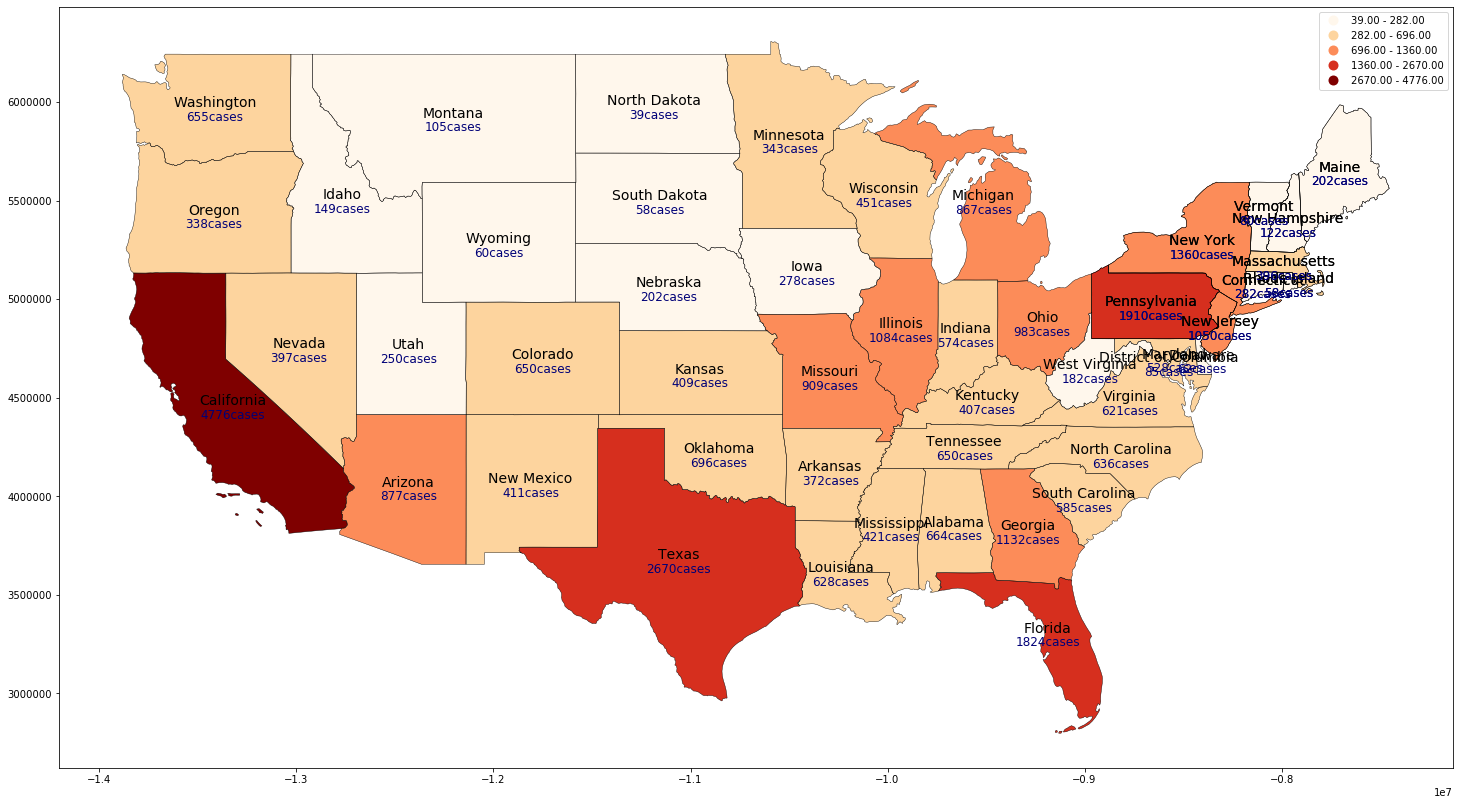

In [24]:
# Visualize Distribution of Victims by State
fig = plt.figure(1, figsize=(25,14))
ax = fig.add_subplot()
stateDF.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0],ha='center', fontsize=14),axis=1)
stateDF.apply(lambda x: ax.annotate(s=str(x.Cases) + 'cases',\
                                    xy=(x.geometry.centroid.coords[0][0], x.geometry.centroid.coords[0][1] - 70000), \
                                    ha='center', color='#000077', fontsize=12),axis=1)
stateDF.boundary.plot(ax=ax, color='Black', linewidth=.4)
stateDF.plot(ax=ax,figsize=(25,14),column='Cases', legend='true',cmap='OrRd',scheme='fisher_jenks')

<h4>3. Distribution by Population and Victim Ratio</h4>

In [25]:
# Distribution by State characteristics
stateDF = stateDF.merge(state2019, on='NAME')
stateDF.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0      06  01779778  0400000US06    06     CA            California   00   
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region  \
0  403483823181  20483271881       West   
1     158350578     18633500  Northeast   
2  138903200855  31407883551  Southeast   
3  148963503399   4947080103  Southeast   
4  214045425549   2397728105       West   

                                            geometry  Cases  Crime2019  \
0  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....   4776      441.2   
1  POLYGON Z ((-8584932.302 4685414.972 0.000, -8...     85     1049.0   
2  MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...   1824      378.4   
3  POLYGON Z ((-9529523.377 4137300.133 0.000, -9...   1132      340.7   
4  POLYGON Z ((-13051434.065 5496245.142 0.000, -...    149      223.8   

   Population  PovertyRate  agencies  officer  
0    39512223         11.8       955  79616.0  
1      705749         14.1        10   4228.0  
2    21477737         12.7      1232  46370.0  
3    10617423         13.5       834  21562.0  
4     1787065         11.0       156   3011.0

In [26]:
# Calculate victim/population ratio
stateDF['popCaseRatio'] = stateDF.apply(lambda row: 100*(row.Cases/row.Population),axis=1)
stateDF.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0      06  01779778  0400000US06    06     CA            California   00   
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region  \
0  403483823181  20483271881       West   
1     158350578     18633500  Northeast   
2  138903200855  31407883551  Southeast   
3  148963503399   4947080103  Southeast   
4  214045425549   2397728105       West   

                                            geometry  Cases  Crime2019  \
0  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....   4776      441.2   
1  POLYGON Z ((-8584932.302 4685414.972 0.000, -8...     85     1049.0   
2  MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...   1824      378.4   
3  POLYGON Z ((-9529523.377 4137300.133 0.000, -9...   1132      340.7   
4  POLYGON Z ((-13051434.065 5496245.142 0.000, -...    149      223.8   

   Population  PovertyRate  agencies  officer  popCaseRatio  
0    39512223         11.8       955  79616.0      0.012087  
1      705749         14.1        10   4228.0      0.012044  
2    21477737         12.7      1232  46370.0      0.008493  
3    10617423         13.5       834  21562.0      0.010662  
4     1787065         11.0       156   3011.0      0.008338

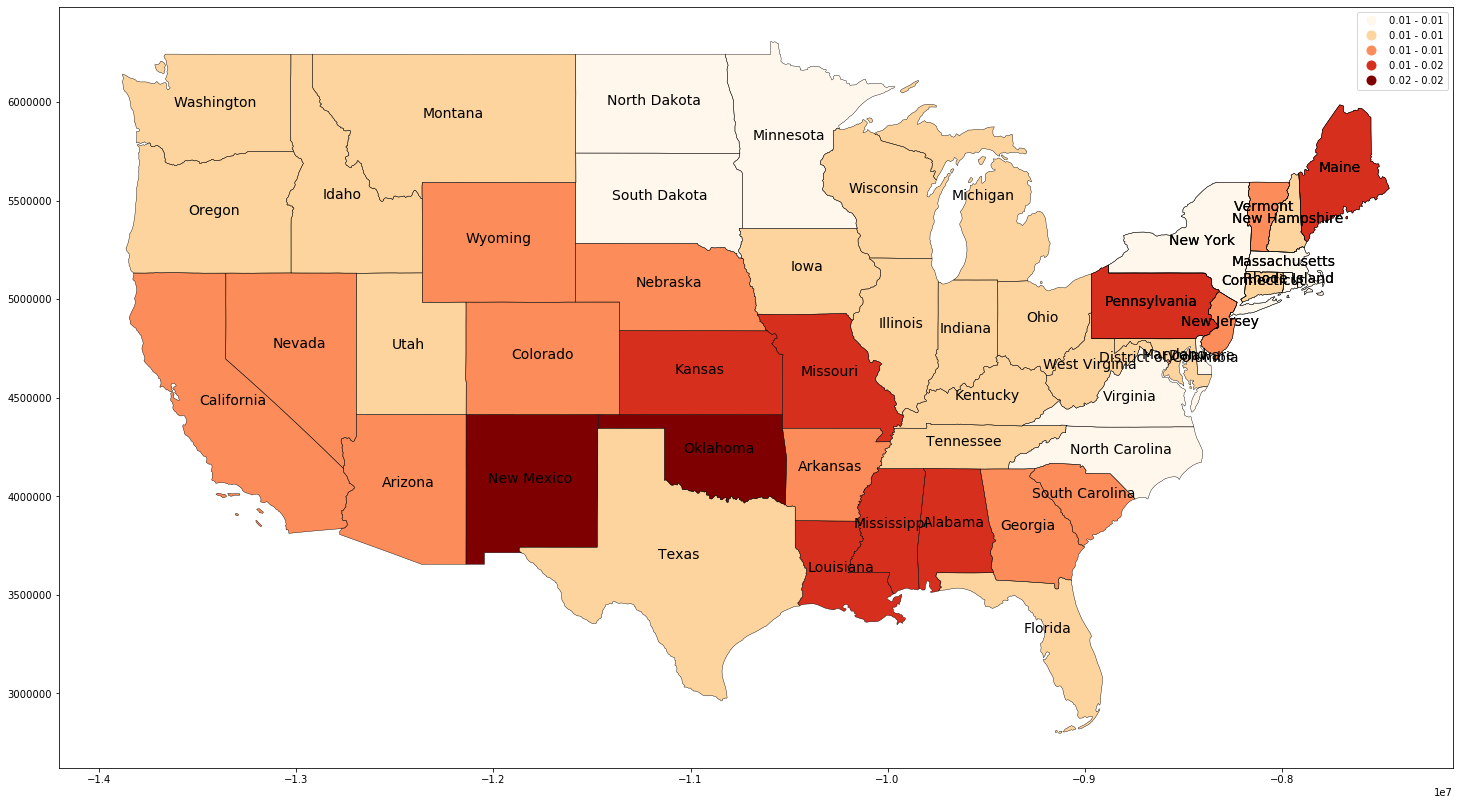

In [27]:
# visualizing cases/population ratio
fig = plt.figure(1, figsize=(25,14))
ax = fig.add_subplot()
stateDF.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0],ha='center', fontsize=14),axis=1)
stateDF.boundary.plot(ax=ax, color='Black', linewidth=.4)
stateDF.plot(ax=ax,figsize=(25,14),column='popCaseRatio', legend='true',cmap='OrRd',scheme='fisher_jenks')

<h4>4. Distribution of Crime rate and Victim Ratio</h4>

In [51]:
# Calculate victim/crime per 100,000 population ratio
stateDF['crimeCaseRatio'] = stateDF.apply(lambda row: 100*(row.Cases/row.Crime2019),axis=1)
stateDF.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0      06  01779778  0400000US06    06     CA            California   00   
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region  \
0  403483823181  20483271881       West   
1     158350578     18633500  Northeast   
2  138903200855  31407883551  Southeast   
3  148963503399   4947080103  Southeast   
4  214045425549   2397728105       West   

                                            geometry  Cases  Crime2019  \
0  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....   4776      441.2   
1  POLYGON Z ((-8584932.302 4685414.972 0.000, -8...     85     1049.0   
2  MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...   1824      378.4   
3  POLYGON Z ((-9529523.377 4137300.133 0.000, -9...   1132      340.7   
4  POLYGON Z ((-13051434.065 5496245.142 0.000, -...    149      223.8   

   Population  PovertyRate  agencies  officer  popCaseRatio  crimeCaseRatio  
0    39512223         11.8       955  79616.0      0.012087     1082.502267  
1      705749         14.1        10   4228.0      0.012044        8.102955  
2    21477737         12.7      1232  46370.0      0.008493      482.029598  
3    10617423         13.5       834  21562.0      0.010662      332.257118  
4     1787065         11.0       156   3011.0      0.008338       66.577301

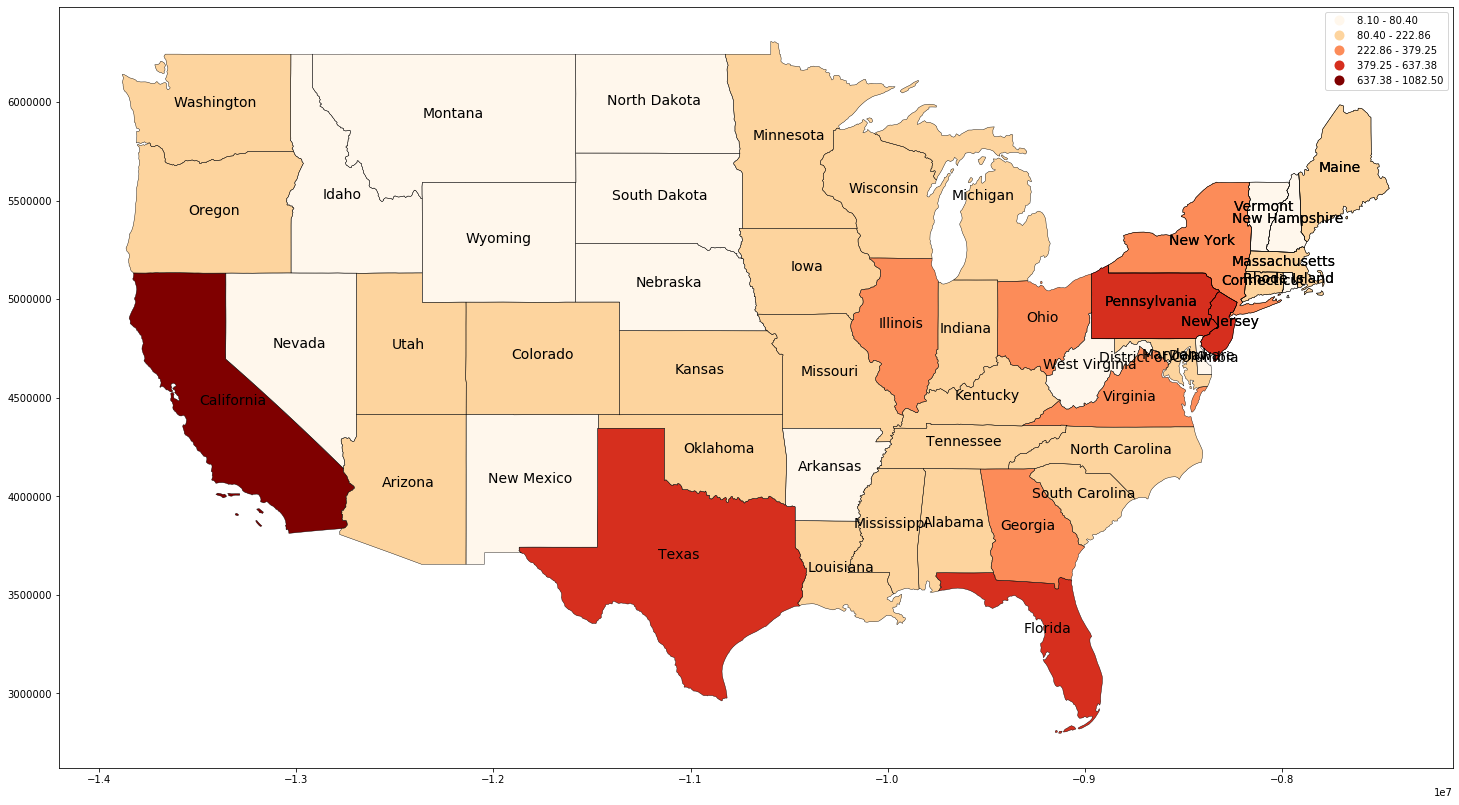

In [29]:
# visualizing cases/population ratio
fig = plt.figure(1, figsize=(25,14))
ax = fig.add_subplot()
stateDF.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0],ha='center', fontsize=14),axis=1)
stateDF.boundary.plot(ax=ax, color='Black', linewidth=.4)
stateDF.plot(ax=ax,figsize=(25,14),column='crimeCaseRatio', legend='true',cmap='OrRd',scheme='fisher_jenks')

<h3>5. Correlation by State Characteristics</h3>

In [30]:
# heatmap function from seaborn library website https://seaborn.pydata.org/examples/many_pairwise_correlations.html
def heatmap_corr(dataset, method='spearman', ready=False, mask=True, nominal=False):
    if not ready:
        corr = dataset.corr(method=method)
    elif ready:
        corr = dataset
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    vmax = corr.max().max()
    if nominal:
        center = 0.5
        cmap=None
    elif not nominal:
        center = 0
    if mask:
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        vmax = corr.replace(1, -2).max().max()
    elif not mask:
        mask=None
    f, ax = plt.subplots(figsize=(20,9))
    
    return sns.heatmap(corr, cmap=cmap, mask=mask, vmax=vmax, center=center, annot=True, square=True, 
                       linewidths=0.5, cbar_kws={'shrink': 0.5})


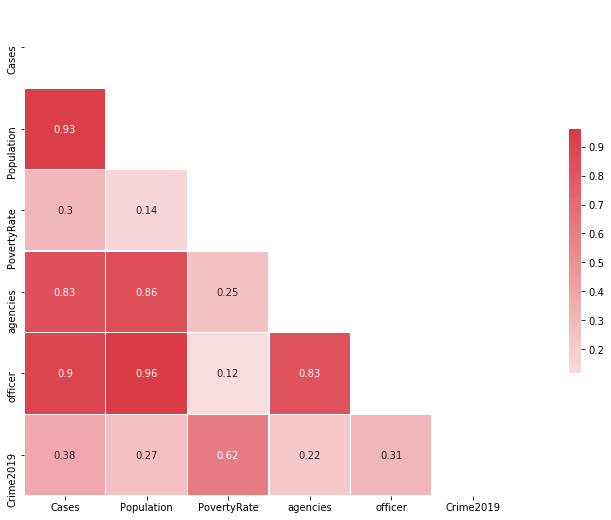

In [50]:
stateCor = stateDF[['Cases', 'Population', 'PovertyRate','agencies','officer','Crime2019']]

heatmap_corr(stateCor, method='spearman')

<h3>6. Distribution by Victim Characteristic - Age & Gender</h3>
This goes in the first section of analysis in the report and presentation *

In [13]:
encountersDF.Age.unique()

array(['17', '24', '31', '28', '41', '25', '26', '22', '35', '20', '88',
       '40', '85', '50', '42', '43', '', '27', '29', '18', '46', '33',
       '59', '51', '36', '23', '38', '44', '34', '39', '30', '37', '45',
       '16', '47', '53', '55', '54', '19', '80', '11', '32', '52', '48',
       '21', '77', '14', '66', '15', '60', '56', '58', '83', '9', '65',
       '57', '7', '62', '10', '18-25', '49', '4', '75', '67', '63', '69',
       '74', '70', '68', '61', '13', '8', '1', '72', '3', '71', '0.75',
       '64', '5', '90', '87', '76', '2', '79', '84', '6', '78', '12',
       '86', '73', '91', '0.25', '0.8', '0.16', '92', '89', '81', '0.5',
       '95', '0.66', '97', '82', '93', '0.17', '0.33', '107', '0.58',
       '0.08', '101'], dtype=object)

In [14]:
# Distribution by Age and gender

def age_categorize(age):
    if age == '':
        return 'Not specified'
    elif age == '18-25':
        return '20-29'
    
    age = float(age)

    if age < 10:
        return '0-9'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60+'

# categorize age
encountersDF['Age_cat'] = [age_categorize(i) for i in encountersDF['Age']]
encountersDF.head()

Unique ID Age  Gender                     Race       Date           City  \
0     25746  17    Male  European-American/White 2000-01-01        Willits   
1         1  24  Female   African-American/Black 2000-01-02     Sacramento   
2         8  31    Male         Race unspecified 2000-01-06         Muscoy   
3        10  28    Male         Race unspecified 2000-01-07         Downey   
4        13  24    Male         Race unspecified 2000-01-09  Moreno Valley   

  STUSPS    Zip Armed/Unarmed Alleged weapon  ...   STATENS     AFFGEOID  \
0     CA  95490                               ...  01779778  0400000US06   
1     CA  95823                               ...  01779778  0400000US06   
2     CA  92407                               ...  01779778  0400000US06   
3     CA  90242                               ...  01779778  0400000US06   
4     CA  92553                               ...  01779778  0400000US06   

  GEOID        NAME LSAD         ALAND       AWATER region  \
0    06  California   00  403483823181  20483271881   West   
1    06  California   00  403483823181  20483271881   West   
2    06  California   00  403483823181  20483271881   West   
3    06  California   00  403483823181  20483271881   West   
4    06  California   00  403483823181  20483271881   West   

                                          geometry_y Age_cat  
0  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....   10-19  
1  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....   20-29  
2  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....   30-39  
3  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....   20-29  
4  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....   20-29  

[5 rows x 27 columns]

In [15]:
encountersDF.Gender.unique()

array(['Male', 'Female', 'Transgender', ''], dtype=object)

In [16]:
# change empty cells to 'not specified'
def gender_cat(gender):
    if gender == '':
        return 'Not specified'
    else:
        return gender
    
encountersDF['Gender'] = [gender_cat(i) for i in encountersDF['Gender']]
encountersDF.Gender.unique()

array(['Male', 'Female', 'Transgender', 'Not specified'], dtype=object)

In [17]:
# create age categorized column to visualize it
age_cases = encountersDF[['Age_cat','Gender']]
age_cases['Cases'] = [1]*32488
table = pd.pivot_table(age_cases,index='Age_cat', columns='Gender', values='Cases', aggfunc=np.sum, fill_value=0)
table.reset_index(inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# determine axis for a pyramid graph
y_age = table['Age_cat']
x_M = table['Male']
x_F = table['Female']*-1

In [19]:
import plotly.graph_objects as gp
# Creating instance of the figure
fig = gp.Figure()
  
# Adding Male data to the figure
fig.add_trace(gp.Bar(y= y_age, x = x_M, 
                     name = 'Male', 
                     orientation = 'h'))
  
# Adding Female data to the figure
fig.add_trace(gp.Bar(y = y_age, x = x_F,
                     name = 'Female', orientation = 'h'))
  
# Updating the layout for our graph
fig.update_layout(title = 'Victims by Age and Gender',
                 title_font_size = 22, barmode = 'relative',
                 bargap = 0.0, bargroupgap = 0,)
  
fig.show()

<h3>7. Time Series Visualization</h3>

In [32]:
# Query cases in Time Series
encountersDF_1 = encountersDF.query("Date >= '2001-01-01' and Date <= '2005-12-31'")
encountersDF_2 = encountersDF.query("Date >= '2006-01-01' and Date <= '2010-12-31'")
encountersDF_3 = encountersDF.query("Date >= '2011-01-01' and Date <= '2015-12-31'")
encountersDF_4 = encountersDF.query("Date >= '2016-01-01' and Date <= '2020-12-31'")


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{-120: ([<matplotlib.lines.Line2D at 0x7fcdf293dcd0>],
  [Text(1045934.9183736619, -73142.30198417217, '120°W')]),
 -90: ([<matplotlib.lines.Line2D at 0x7fcdf293fb50>],
  [Text(4183739.6734946477, -73142.30198417217, '90°W')]),
 -60: ([<matplotlib.lines.Line2D at 0x7fcdf29b8bd0>],
  [Text(7306915.968218799, -73142.30198417217, '60°W')])}

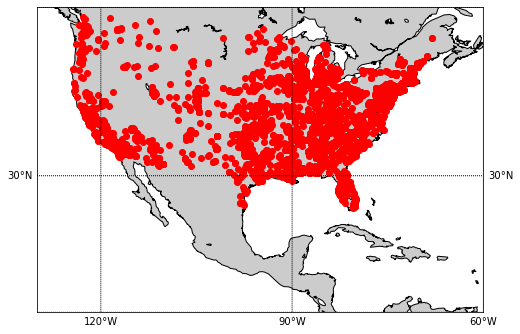

In [148]:
# Visualizing through basemep - did not include in report or presentation because it is hard to see.
fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(llcrnrlon=-130.,llcrnrlat=10.,urcrnrlon=-60.,urcrnrlat=50.,\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
m.drawcoastlines()
m.fillcontinents(zorder=0)

encountersDF_1['Latitude'] = pd.to_numeric(encountersDF_1['Latitude'])
encountersDF_1['Longitude'] = pd.to_numeric(encountersDF_1['Longitude'])
    
Lat = encountersDF_1['Latitude'].tolist()
Lon = encountersDF_1['Longitude'].tolist()

x,y = m(Lon,Lat)
plt.plot(x,y,'ro');

# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])

# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

In [36]:
# aggregating the number of victims by state during the 5-year time period.
state_cases = encountersDF_1.groupby(['STUSPS']).size().reset_index(name='Cases')
# merge cases for each state with the map
stateDF_1 = stateDF.merge(state_cases, on='STUSPS')
stateDF_1.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0      06  01779778  0400000US06    06     CA            California   00   
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region  \
0  403483823181  20483271881       West   
1     158350578     18633500  Northeast   
2  138903200855  31407883551  Southeast   
3  148963503399   4947080103  Southeast   
4  214045425549   2397728105       West   

                                            geometry  Cases_x  Crime2019  \
0  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....     4776      441.2   
1  POLYGON Z ((-8584932.302 4685414.972 0.000, -8...       85     1049.0   
2  MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...     1824      378.4   
3  POLYGON Z ((-9529523.377 4137300.133 0.000, -9...     1132      340.7   
4  POLYGON Z ((-13051434.065 5496245.142 0.000, -...      149      223.8   

   Population  PovertyRate  agencies  officer  popCaseRatio  crimeCaseRatio  \
0    39512223         11.8       955  79616.0      0.012087     1082.502267   
1      705749         14.1        10   4228.0      0.012044        8.102955   
2    21477737         12.7      1232  46370.0      0.008493      482.029598   
3    10617423         13.5       834  21562.0      0.010662      332.257118   
4     1787065         11.0       156   3011.0      0.008338       66.577301   

   Cases_y  
0     1060  
1       12  
2      246  
3      183  
4       16

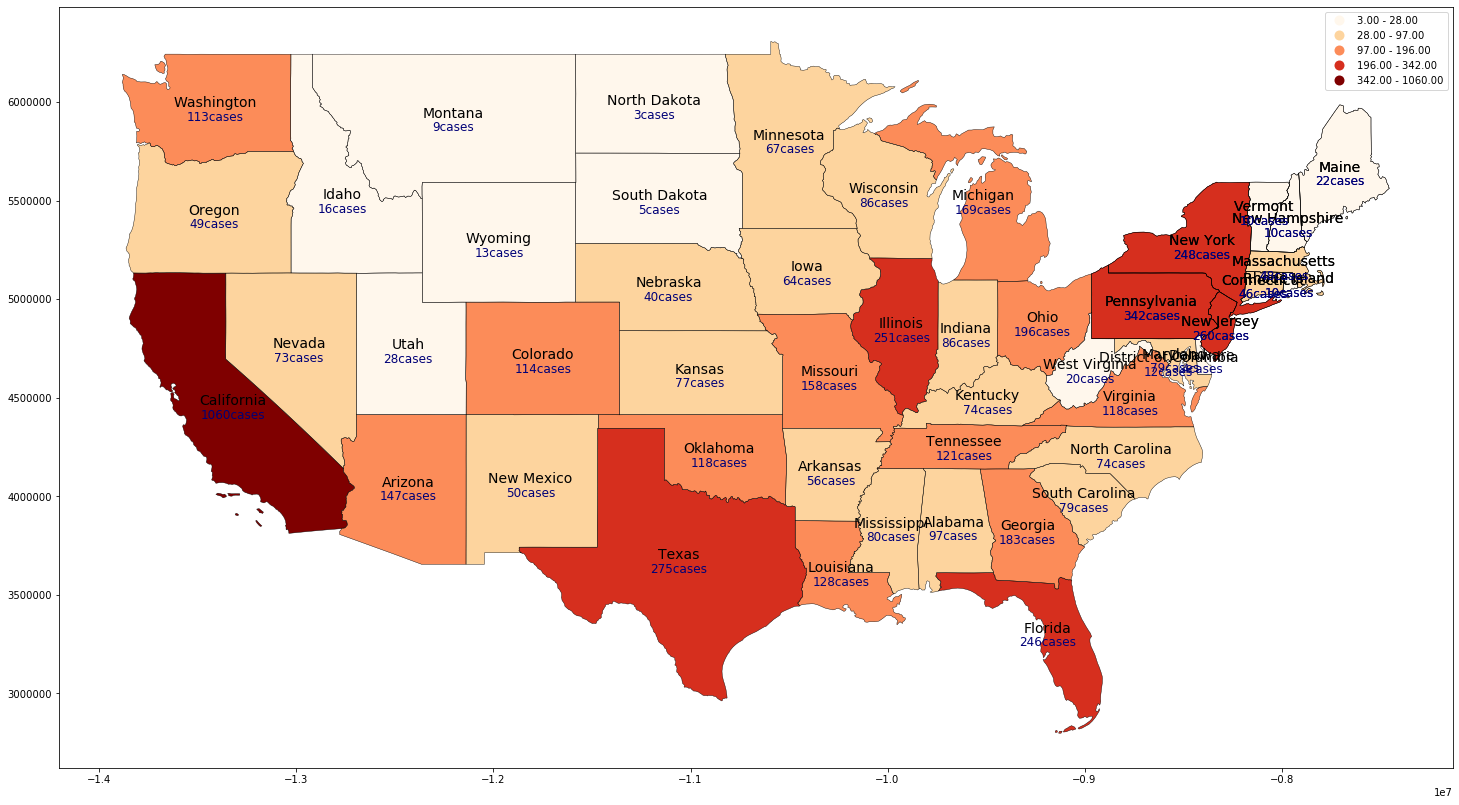

In [38]:
# visualization for 2001-2005
state_cases = encountersDF_1.groupby(['STUSPS']).size().reset_index(name='Cases')
# merge cases for each state with the map
stateDF_1 = stateDF.merge(state_cases, on='STUSPS')

fig = plt.figure(1, figsize=(25,14))
ax = fig.add_subplot()
stateDF_1.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0],ha='center', fontsize=14),axis=1)
stateDF_1.apply(lambda x: ax.annotate(s=str(x.Cases_y) + 'cases',\
                                    xy=(x.geometry.centroid.coords[0][0], x.geometry.centroid.coords[0][1] - 70000), \
                                    ha='center', color='#000077', fontsize=12),axis=1)
stateDF_1.boundary.plot(ax=ax, color='Black', linewidth=.4)
stateDF_1.plot(ax=ax,figsize=(25,14),column='Cases_y', legend='true',cmap='OrRd',scheme='fisher_jenks')

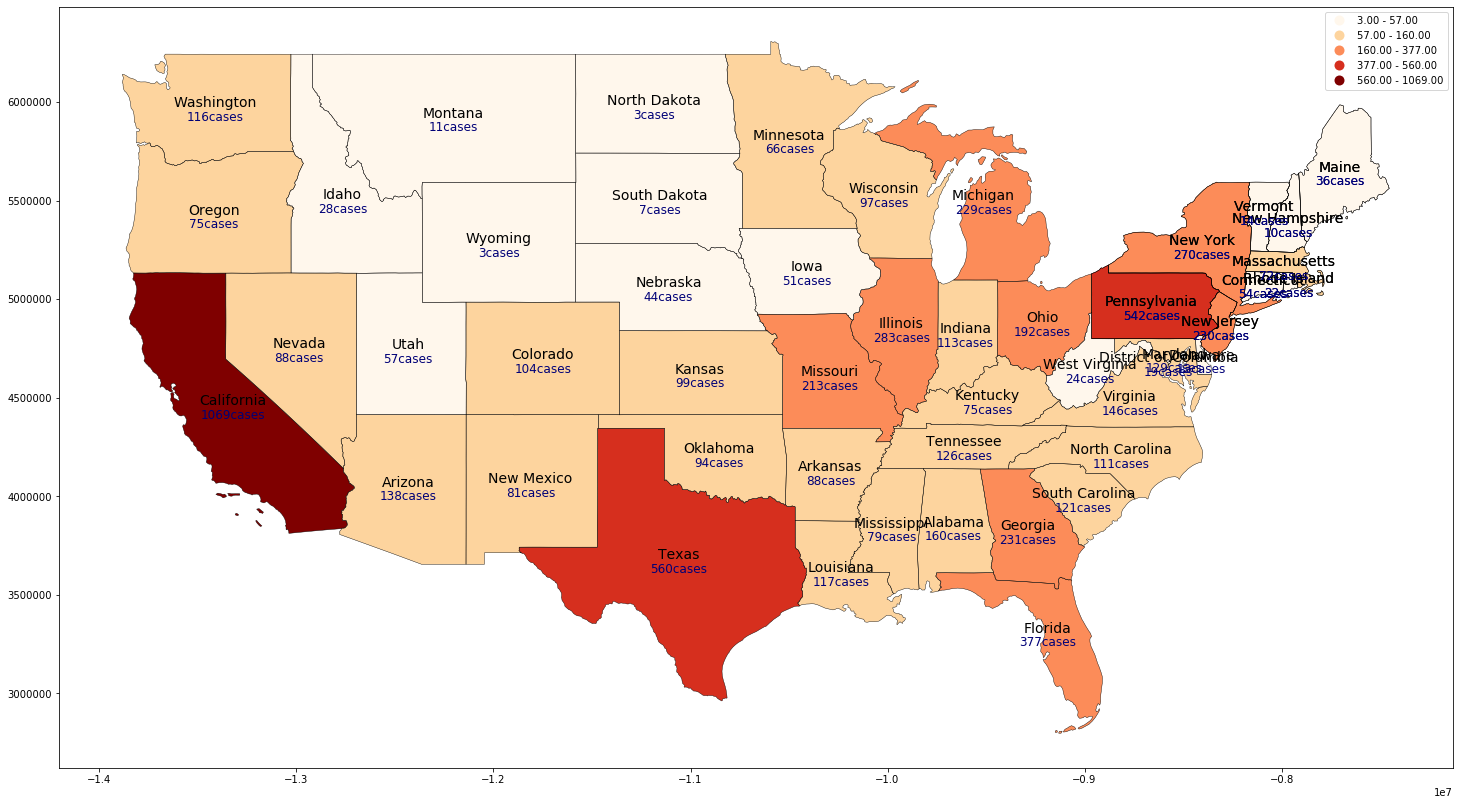

In [39]:
# aggregating the number of victims by state during the 5-year time period.
state_cases = encountersDF_2.groupby(['STUSPS']).size().reset_index(name='Cases')
# merge cases for each state with the map
stateDF_2 = stateDF.merge(state_cases, on='STUSPS')

# visualization for 2006-2010
fig = plt.figure(1, figsize=(25,14))
ax = fig.add_subplot()
stateDF_2.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0],ha='center', fontsize=14),axis=1)
stateDF_2.apply(lambda x: ax.annotate(s=str(x.Cases_y) + 'cases',\
                                    xy=(x.geometry.centroid.coords[0][0], x.geometry.centroid.coords[0][1] - 70000), \
                                    ha='center', color='#000077', fontsize=12),axis=1)
stateDF_2.boundary.plot(ax=ax, color='Black', linewidth=.4)
stateDF_2.plot(ax=ax,figsize=(25,14),column='Cases_y', legend='true',cmap='OrRd',scheme='fisher_jenks')

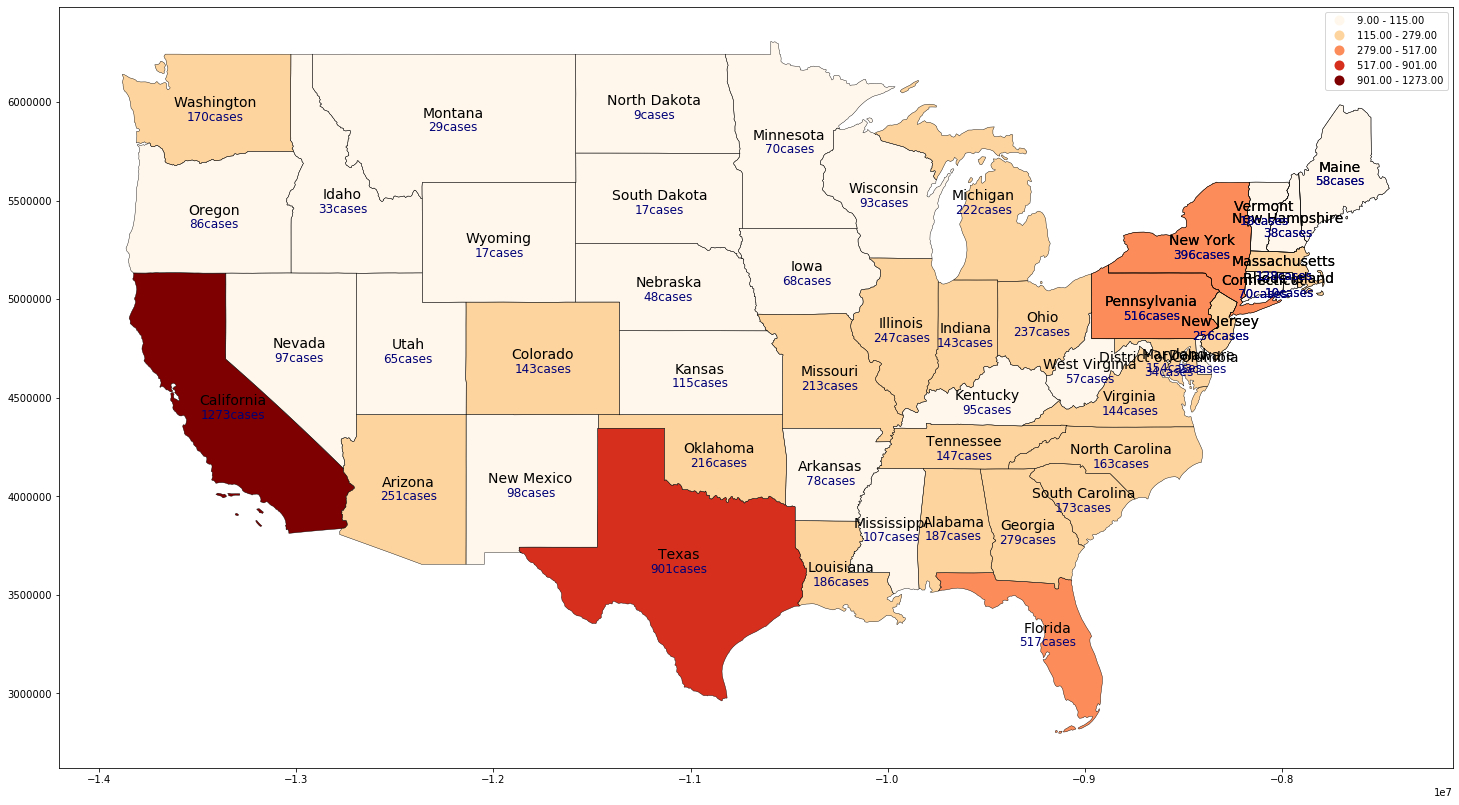

In [40]:
# aggregating the number of victims by state during the 5-year time period.
state_cases = encountersDF_3.groupby(['STUSPS']).size().reset_index(name='Cases')
# merge cases for each state with the map
stateDF_3 = stateDF.merge(state_cases, on='STUSPS')

# visualization for 2011-2015
fig = plt.figure(1, figsize=(25,14))
ax = fig.add_subplot()
stateDF_3.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0],ha='center', fontsize=14),axis=1)
stateDF_3.apply(lambda x: ax.annotate(s=str(x.Cases_y) + 'cases',\
                                    xy=(x.geometry.centroid.coords[0][0], x.geometry.centroid.coords[0][1] - 70000), \
                                    ha='center', color='#000077', fontsize=12),axis=1)
stateDF_3.boundary.plot(ax=ax, color='Black', linewidth=.4)
stateDF_3.plot(ax=ax,figsize=(25,14),column='Cases_y', legend='true',cmap='OrRd',scheme='fisher_jenks')

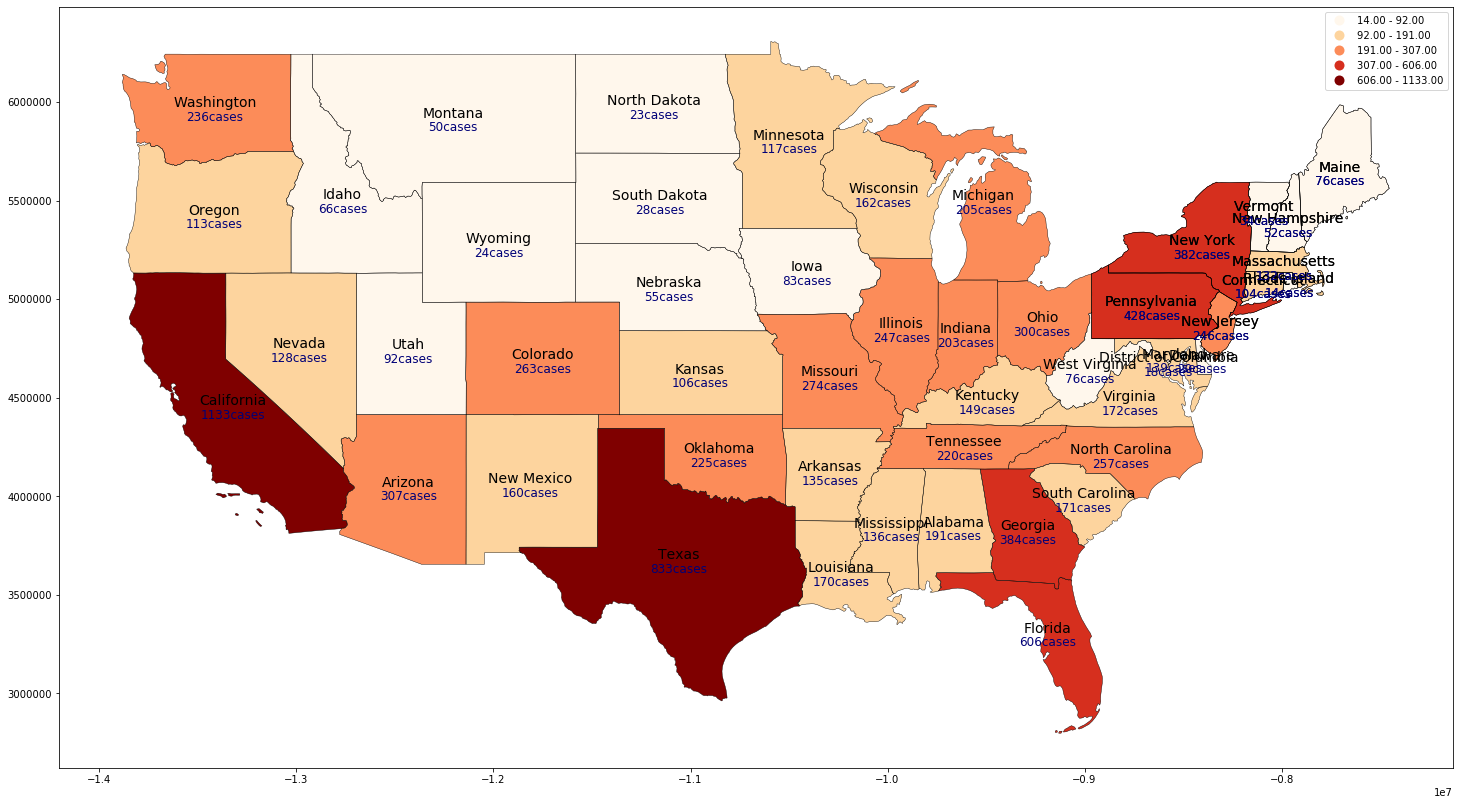

In [41]:
# aggregating the number of victims by state during the 5-year time period.
state_cases = encountersDF_4.groupby(['STUSPS']).size().reset_index(name='Cases')
# merge cases for each state with the map
stateDF_4 = stateDF.merge(state_cases, on='STUSPS')

# visualization for 2016-2020
fig = plt.figure(1, figsize=(25,14))
ax = fig.add_subplot()
stateDF_4.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0],ha='center', fontsize=14),axis=1)
stateDF_4.apply(lambda x: ax.annotate(s=str(x.Cases_y) + 'cases',\
                                    xy=(x.geometry.centroid.coords[0][0], x.geometry.centroid.coords[0][1] - 70000), \
                                    ha='center', color='#000077', fontsize=12),axis=1)
stateDF_4.boundary.plot(ax=ax, color='Black', linewidth=.4)
stateDF_4.plot(ax=ax,figsize=(25,14),column='Cases_y', legend='true',cmap='OrRd',scheme='fisher_jenks')